In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

In [13]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preporcessing

In [15]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [17]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [20]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

In [50]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [52]:
model = Sequential()

In [55]:
model.add(Conv2D(filters=32,kernel_size=3, padding='same',activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [57]:
model.add(Conv2D(filters=64,kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [59]:
model.add(Conv2D(filters=128,kernel_size=3, padding='same',activation='relu',))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [61]:
model.add(Conv2D(filters=256,kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [63]:
model.add(Conv2D(filters=512,kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [65]:
model.add(Dropout(0.25)) # avoid overfitting

In [67]:
model.add(Flatten())

In [69]:
model.add(Dense(units=1500, activation='relu'))

In [71]:
model.add(Dropout(0.4))

In [73]:
#output layer
model.add(Dense(units=38, activation="softmax"))

In [76]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss="categorical_crossentropy",metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1511s 687ms/step - accuracy: 0.4182 - loss: 2.0693 - val_accuracy: 0.8019 - val_loss: 0.6204
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1501s 683ms/step - accuracy: 0.8482 - loss: 0.4887 - val_accuracy: 0.9008 - val_loss: 0.3077
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1502s 684ms/step - accuracy: 0.9110 - loss: 0.2722 - val_accuracy: 0.9426 - val_loss: 0.1767
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1502s 684ms/step - accuracy: 0.9401 - loss: 0.1854 - val_accuracy: 0.9468 - val_loss: 0.1621
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1502s 683ms/step - accuracy: 0.9550 - loss: 0.1352 - val_accuracy: 0.9602 - val_loss: 0.1248
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1502s 684ms/step - accuracy: 0.9648 - loss: 0.1065 - val_accuracy: 0.9526 - val_loss: 0.1626
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1501s 683ms/step - accuracy: 0.9705 - loss: 0.0912 - val_accuracy: 0.9607 - val_loss: 0.1249
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1500s 683ms/s

In [85]:

train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 481s 219ms/step - accuracy: 0.9928 - loss: 0.0221


In [87]:
print(train_loss, train_acc)

0.020132333040237427 0.993370771408081


In [89]:
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 110s 201ms/step - accuracy: 0.9692 - loss: 0.1069


In [91]:
print(val_loss, val_acc)

0.1051897406578064 0.9697814583778381


## Saving Model

In [95]:
model.save("trained_model.keras")

In [97]:
training_history.history

{'accuracy': [0.6184365749359131,
  0.8670318126678467,
  0.9172629714012146,
  0.9411053657531738,
  0.9562415480613708,
  0.9656590223312378,
  0.9710932374000549,
  0.9765843749046326,
  0.9793726205825806,
  0.9825734496116638],
 'loss': [1.3003122806549072,
  0.4249401390552521,
  0.25418993830680847,
  0.18094639480113983,
  0.13448350131511688,
  0.10455308854579926,
  0.08939370512962341,
  0.07428628206253052,
  0.06346384435892105,
  0.053559642285108566],
 'val_accuracy': [0.8019007444381714,
  0.9008080959320068,
  0.9425790905952454,
  0.9468472599983215,
  0.9601638913154602,
  0.952595055103302,
  0.9606760740280151,
  0.9617573618888855,
  0.9643751382827759,
  0.9697814583778381],
 'val_loss': [0.620358943939209,
  0.3077324330806732,
  0.1767287403345108,
  0.16207177937030792,
  0.1248081848025322,
  0.16260847449302673,
  0.12488287687301636,
  0.12969084084033966,
  0.11661111563444138,
  0.10518982261419296]}

In [99]:

import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [104]:
training_history.history['accuracy']

[0.6184365749359131,
 0.8670318126678467,
 0.9172629714012146,
 0.9411053657531738,
 0.9562415480613708,
 0.9656590223312378,
 0.9710932374000549,
 0.9765843749046326,
 0.9793726205825806,
 0.9825734496116638]

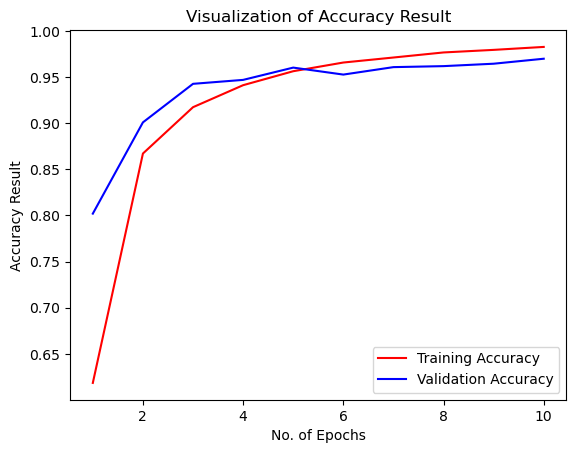

In [112]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'], color='red' , label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'], color='blue' , label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [117]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [119]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [125]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 114s 207ms/step


(array([[1.0000000e+00, 2.5120409e-10, 1.2899352e-13, ..., 5.7560597e-20,
         3.5913222e-19, 3.6713068e-17],
        [1.0000000e+00, 2.2022748e-09, 2.7297897e-12, ..., 2.3848582e-17,
         4.3782866e-16, 1.6224925e-14],
        [1.0000000e+00, 1.5393529e-15, 1.6297743e-15, ..., 1.5126721e-26,
         9.8308532e-24, 5.5843299e-20],
        ...,
        [2.9018858e-09, 1.9582501e-11, 1.4755014e-07, ..., 7.1084437e-11,
         1.1981444e-10, 9.9995470e-01],
        [8.0718235e-14, 7.6162810e-16, 3.2924058e-10, ..., 1.3803265e-13,
         3.5617529e-14, 1.0000000e+00],
        [5.4652127e-11, 4.3444599e-11, 1.6881193e-08, ..., 3.1804632e-11,
         1.2393346e-09, 9.9998713e-01]], dtype=float32),
 (17572, 38))

In [127]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [129]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [133]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

2024-08-18 09:47:51.976107: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [135]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [141]:
from sklearn.metrics import classification_report, confusion_matrix

In [139]:
print(classification_report(Y_true, predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.98      0.95       504
                                 Apple___Black_rot       0.99      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       440
                                   Apple___healthy       0.97      0.93      0.95       502
                               Blueberry___healthy       0.99      0.95      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.92      0.94       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.98      0.

In [151]:
cn = confusion_matrix(Y_true, predicted_categories)
cn

array([[494,   2,   0, ...,   0,   0,   0],
       [  1, 489,   0, ...,   0,   0,   0],
       [  0,   0, 425, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ..., 488,   0,   0],
       [  0,   0,   0, ...,   0, 438,   0],
       [  0,   0,   0, ...,   0,   0, 477]])

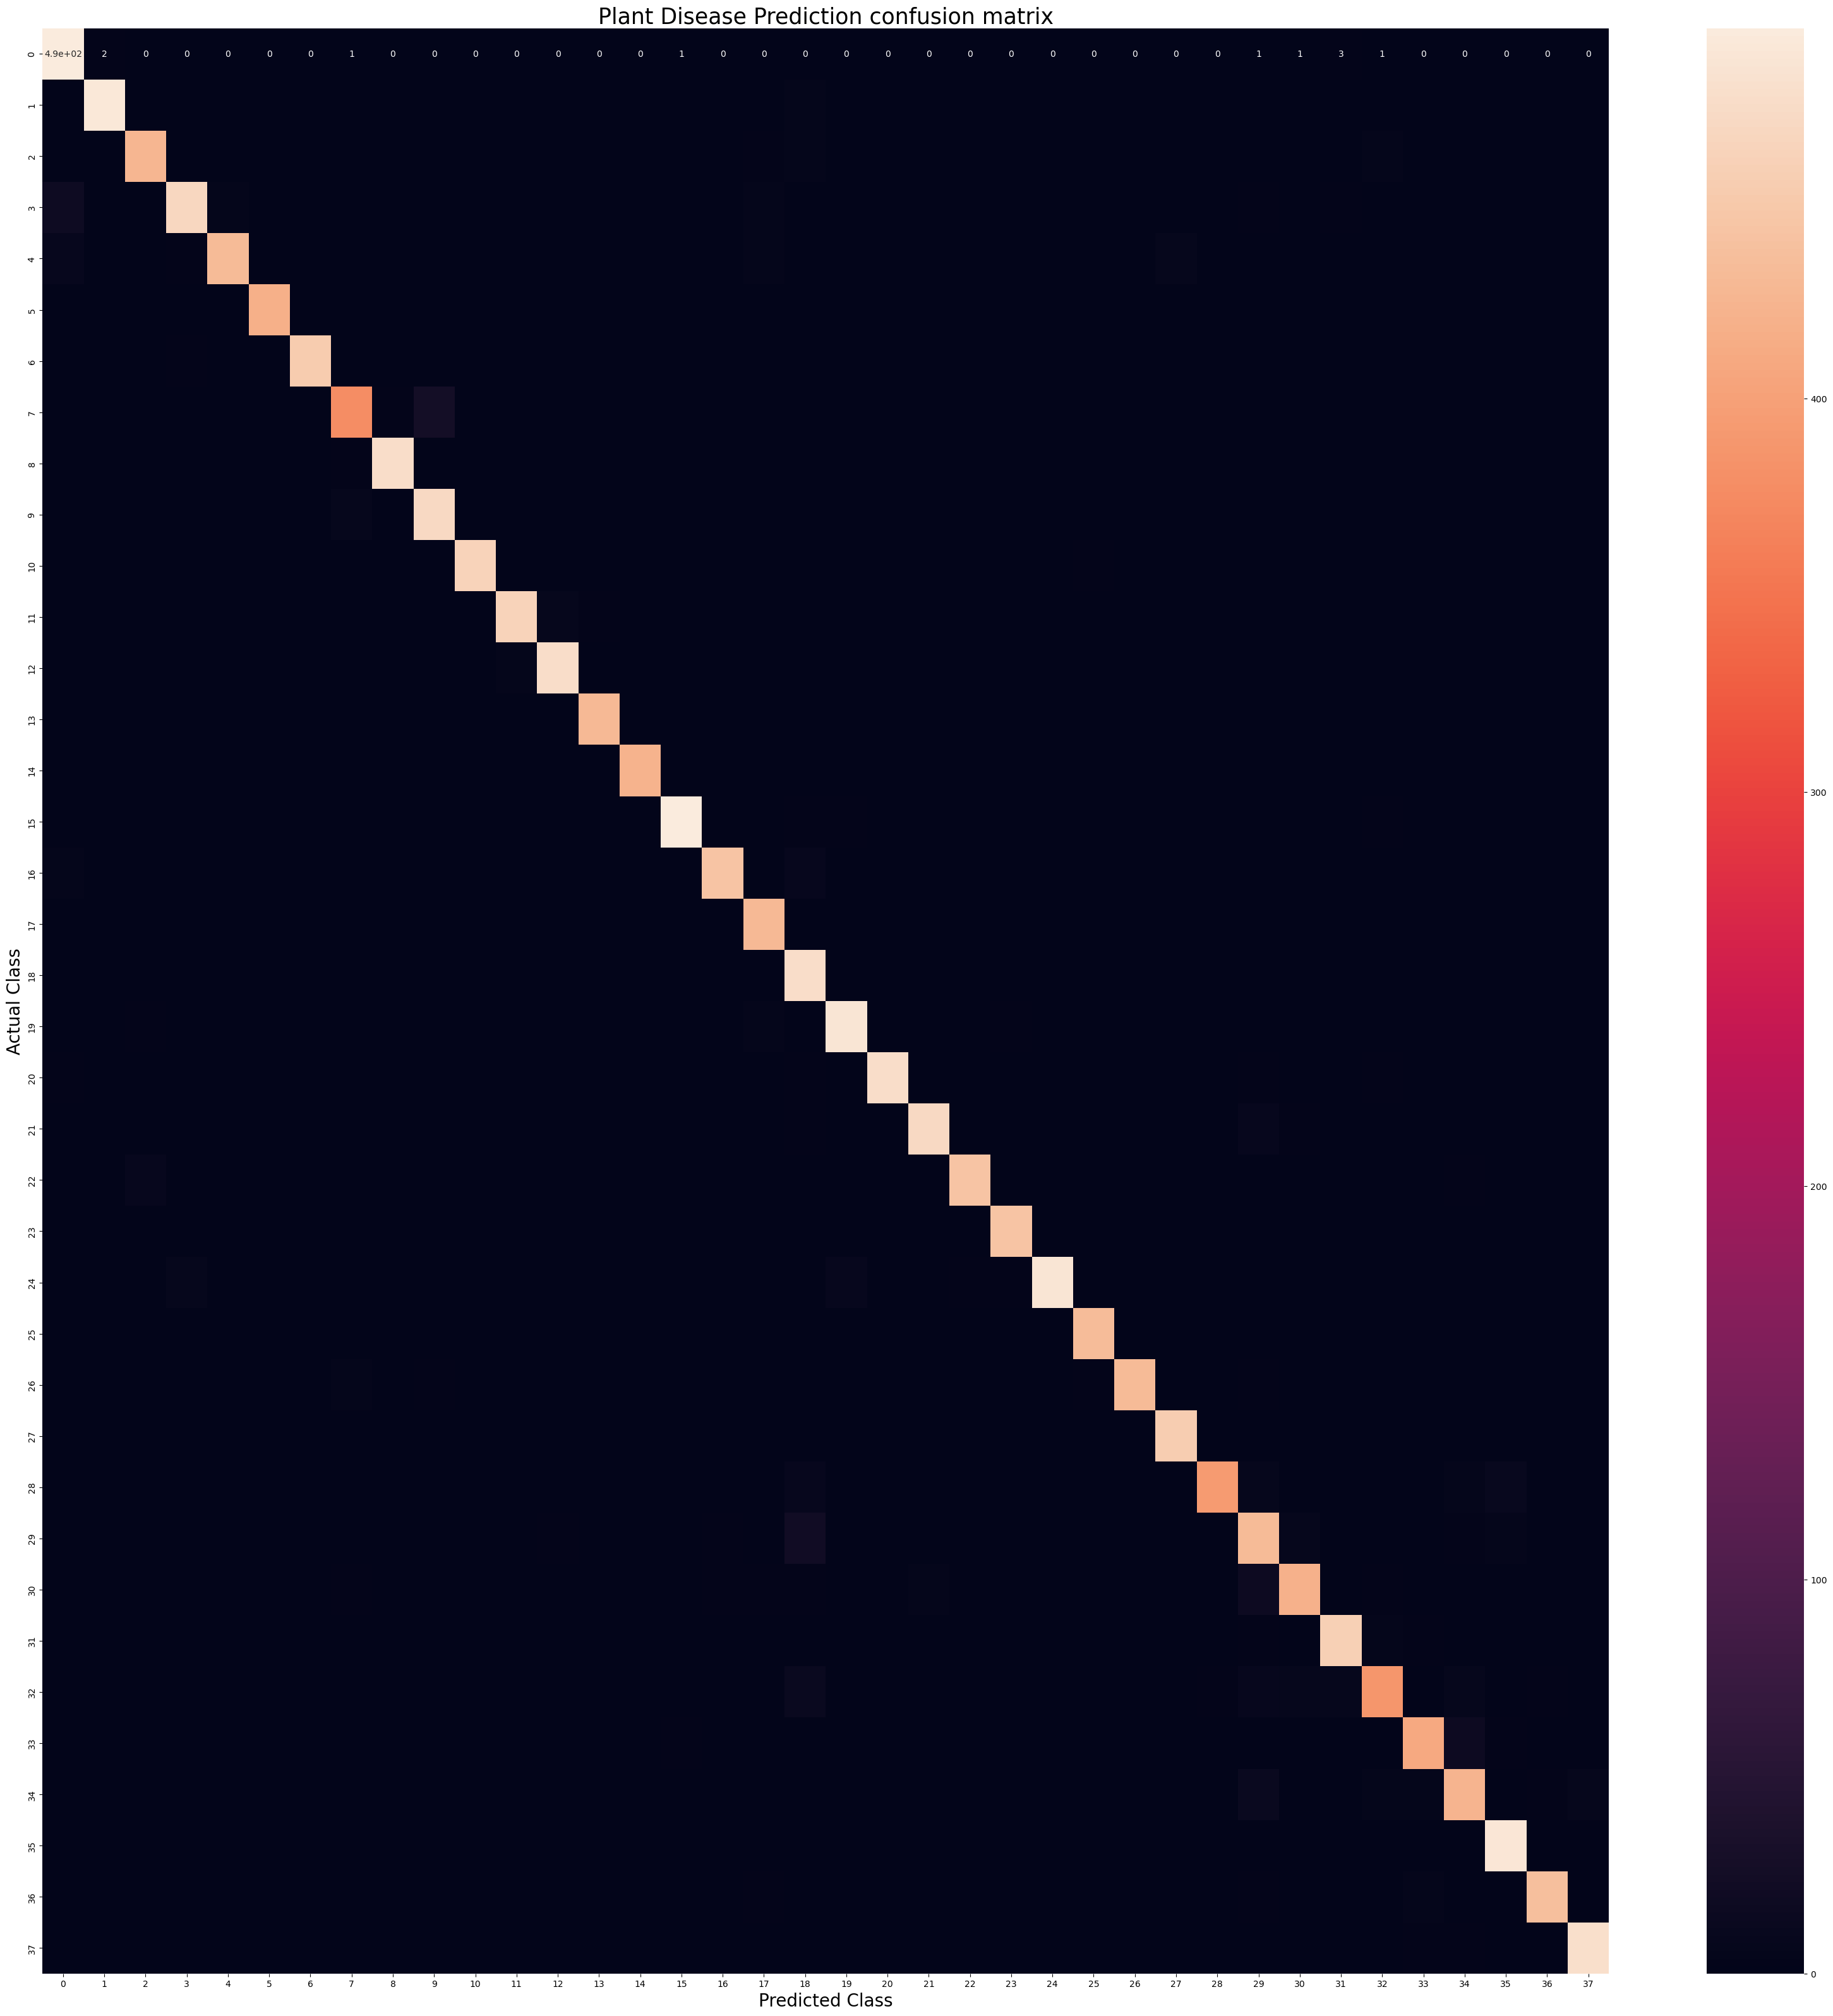

In [176]:
plt.figure(figsize=(40,40))
sns.heatmap(cn,annot=True, annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction confusion matrix",fontsize=25)
plt.show()